<a href="https://colab.research.google.com/github/MoizAhmed2517/Time-Series-Forecasting-Projects/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the BitCoin Forecasting

## Get Data

In [10]:
%cd /content/drive/MyDrive/ColabProjects

/content/drive/MyDrive/ColabProjects


In [11]:
!pwd

/content/drive/MyDrive/ColabProjects


In [12]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-23 18:48:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-02-23 18:48:24 (16.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



###Importing libraries

In [13]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

##Performing Exploratory Analysis

In [22]:
df = pd.read_csv("data_BTC.csv", parse_dates=["Date"], index_col=["Date"])

In [23]:
df.head(30)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566
2013-10-06,BTC,120.65533,121.33866,121.85216,120.55450
2013-10-07,BTC,121.79500,120.65533,121.99166,120.43199
2013-10-08,BTC,123.03300,121.79500,123.64016,121.35066
2013-10-09,BTC,124.04900,123.03300,124.78350,122.59266


In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Closing Price (USD),2787.0,6529.845141,10887.847444,108.58483,460.087500,2780.18250,8506.923720,63346.789035
24h Open (USD),2787.0,6513.579485,10863.800772,108.58483,459.400500,2772.36750,8496.887593,63562.673545
24h High (USD),2787.0,6710.061683,11206.779756,118.67500,469.720995,2874.69625,8763.291985,64801.787870
24h Low (USD),2787.0,6302.417386,10475.811252,83.32833,450.818830,2696.45750,8221.060570,62094.632914


In [25]:
df.isnull().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


#### Code is clean. No data is missing no problem with datatype. Good to perform EDA.

**Questions:**



1.   How many year data it is? How many sample do we have?
2.   Which day BTC is highest and on which date it is lowest?
3.   What is rate of change BTC every week, fortnight, month, quarter, semi-anually and annual.




In [30]:
#AQ1: Answer
len(df)

2787

In [48]:
years = (df.index[-1] - df.index[0])/np.timedelta64(1, "Y")
months = (years - np.floor(years)) * 12.008
days = (months - np.floor(months)) * 30.417
print(f"Total data timeframe is: {int(years)} Years, {int(months)} Months, {int(days)} Days")

Total data timeframe is: 7 Years, 7 Months, 16 Days


#### We have collected data for 7 years 7 months and 16 days data. As DL model like lots of sample hence we are good to as we have total 2787 days of data but as in timeseries smaller number of smaples is often run into data problems.


#### **Note:** The Seasonality of a time series dataset is reffered as the number of samples per year. so for our bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning. We'll get 365 days

<AxesSubplot:xlabel='Date'>

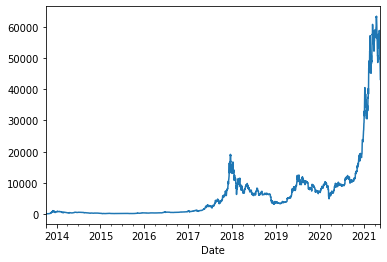

In [50]:
df['Closing Price (USD)'].plot()

In [51]:
bitcoin = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


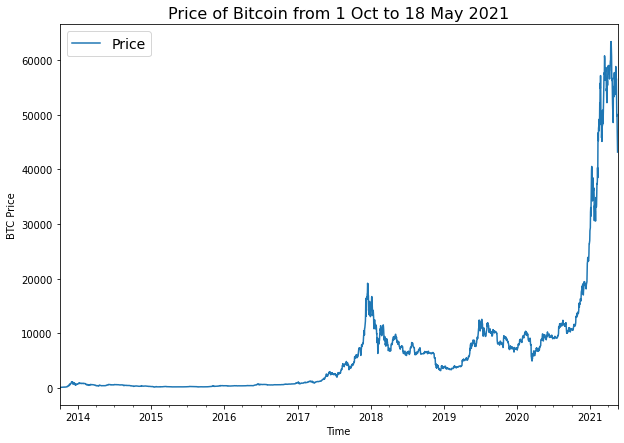

In [60]:
bitcoin.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.xlabel("Time")
plt.title("Price of Bitcoin from 1 Oct to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);